In [25]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
#import matplotlib.pyplot as plt
import os
#import subprocess
import requests
import json

print('TensorFlow version: {}'.format(tf.__version__))


TensorFlow version: 2.1.0


In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
import matplotlib.pyplot as plt

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


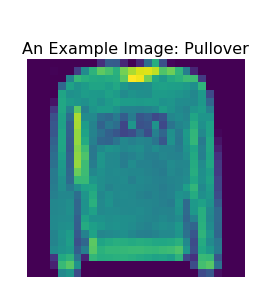

In [28]:
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))


In [29]:
! ls -als deploy-new/model/1

total 156
  4 drwxr-xr-x 4 ec2-user ec2-user   4096 Feb 27 14:33 .
  4 drwxrwxr-x 3 ec2-user ec2-user   4096 Feb 27 14:33 ..
  4 drwxr-xr-x 2 ec2-user ec2-user   4096 Feb 27 14:33 assets
140 -rw-r--r-- 1 ec2-user ec2-user 142510 Feb 27 14:33 saved_model.pb
  4 drwxr-xr-x 2 ec2-user ec2-user   4096 Feb 27 14:33 variables


In [7]:
version = 1
export_path = os.path.join("/home/ec2-user/SageMaker/jsimon-mnist/deploy-new/model", str(version))
print('export_path = {}\n'.format(export_path))


export_path = /home/ec2-user/SageMaker/jsimon-mnist/deploy-new/model/1



In [ ]:
# Examine saved model
#!saved_model_cli show --dir {export_path} --all


In [33]:
# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [49]:
index1=805
index2=index1+2

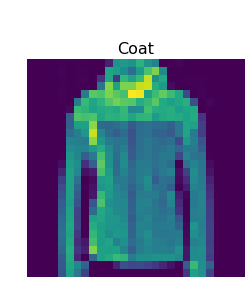

In [50]:
show(index1, class_names[test_labels[index1]])

In [70]:
data = json.dumps({"signature_name": "serving_default", "instances": test_images[index1:index2].tolist()})
#print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))
print(data)

{"signature_name": "serving_default", "instances": [[[[0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [22], [131], [137], [130], [163], [130], [112], [0], [0], [3], [0], [0], [0], [0], [0], [0], [0], [0]], [[0], [0], [0], [0], [2], [0], [1], [1], [0], [0], [151], [143], [124], [92], [137], [182], [205], [122], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]], [[0], [0], [0], [0], [1], [0], [1], [2], [0], [38], [151], [42], [169], [147], [173], [234], [126], [156], [0], [0], [1], [1], [1], [0], [0], [0], [0], [0]], [[0], [0], [0], [0], [1], [0], [1], [0], [0], [97], [208], [146], [206], [205], [232], [237], [158], [137], [7], [0], [0], [0], [1], [0], [0], [0], [0], [0]], [[0], [0], [0], [0], [2], [0], [0], [105], [190], [183], [205], [189], [181], [255], [250], [148], [175], [194], [175], [152], [57], [0], [2], [0], [0], [0], [0], [0]], [[0], [0], [0], [0], [1], [0], [106], [171], [151], [166], [187], [202], [191], [188], [158], [170], [190], [156], [145], [152], [160], [61], [0], [3

In [69]:
%%bash
echo ${data}

ENDPOINT_NAME=fashion-mnist-v1

aws sagemaker-runtime invoke-endpoint \
--endpoint-name ${ENDPOINT_NAME} \
--body ${data} prediction_resp.json

usage: aws [options] <command> <subcommand> [<subcommand> ...] [parameters]
To see help text, you can run:

  aws help
  aws <command> help
  aws <command> <subcommand> help
aws: error: the following arguments are required: outfile


In [63]:
#response = requests.post('http://localhost:8080/ping')
response = requests.post('https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/fashion-mnist-v1/ping')
print(response)

<Response [403]>


In [59]:
headers = {"content-type": "application/json"}
#json_response = requests.post('http://localhost:8080/invocations', data=data, headers=headers)
json_response = requests.post('https://runtime.sagemaker.us-east-1.amazonaws.com/endpoints/fashion-mnist-v1/invocations', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

#show(900, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#  class_names[np.argmax(predictions[1])], test_labels[1], class_names[np.argmax(predictions[1])], test_labels[900] ))

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

KeyError: 'predictions'

In [57]:
json_response = requests.post('http://localhost:8080/invocations', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

print(predictions)

#show(900, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#  class_names[np.argmax(predictions[1])], test_labels[1], class_names[np.argmax(predictions[1])], test_labels[900] ))

ConnectionError: HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /invocations (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f437e0e87b8>: Failed to establish a new connection: [Errno 111] Connection refused',))